ANNDA LAB 2

PART I: Batch mode training using least squares - supervised learning of network weights

63


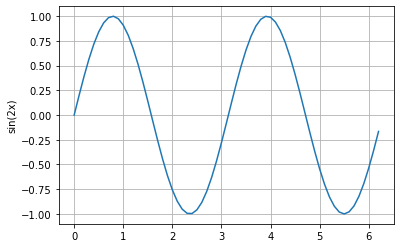

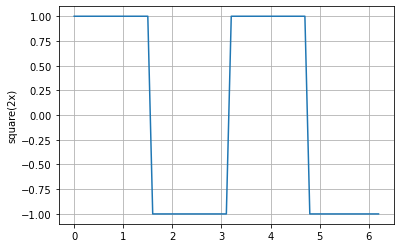

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

the_x_for_train = np.arange(0,2*np.pi,0.1)
the_x_for_test = np.arange(0.05,2*np.pi,0.1)

print(len(the_x_for_train))

f1 = lambda x: np.sin(2*x)

def f2(x):
    if np.sin(x) >= 0:
        return 1
    else:
        return -1

phi = lambda x,mu,sigma: np.exp((-(x-mu)**2)/(2*sigma**2))

training_set_1 = np.array([f1(x) for x in the_x_for_train])
training_set_2 = np.array([f2(2*x) for x in the_x_for_train])
plt.figure()
plt.plot(the_x_for_train,training_set_1)
plt.grid()
plt.ylabel('sin(2x)')
plt.figure()
plt.plot(the_x_for_train,training_set_2)
plt.grid()
plt.ylabel('square(2x)')


testing_set_1 = np.array([f1(x) for x in the_x_for_test])
testing_set_2 = np.array([f2(2*x) for x in the_x_for_test])




The residual error for 1 nodes is 0.606731409174303
The residual error for 2 nodes is 0.5679995253577816
The residual error for 3 nodes is 0.5679995461135783
The residual error for 4 nodes is 0.4226256686934988
The residual error for 5 nodes is 0.5678137568236795
The residual error for 6 nodes is 0.2278326626547891
The residual error for 7 nodes is 0.11899530984934055
The residual error for 8 nodes is 0.047365100630112726
The residual error for 9 nodes is 0.01743860801096702
The residual error for 10 nodes is 0.013011260714730993
The residual error for 11 nodes is 0.011866239095690444
The residual error for 12 nodes is 0.009505411388179454
The residual error for 13 nodes is 0.008143892011360006
The residual error for 14 nodes is 0.0059003684732489205
The residual error for 15 nodes is 0.004916906624517929
The residual error for 16 nodes is 0.0033076232788105038
The residual error for 17 nodes is 0.0026725789939169584
The residual error for 18 nodes is 0.0016152933535526193
The residual

/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


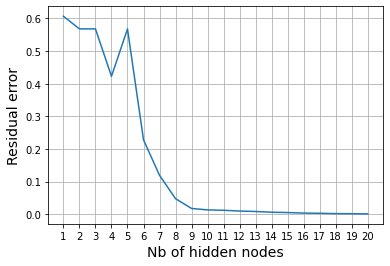

"plt.figure()\nplt.plot(RBF_nodes, the_testing_errors)\nplt.grid()\nplt.xlabel('Nb of hidden nodes')\nplt.ylabel('Test error')\nplt.ylim(0, 5)\nprint('The mimimal error is ' + str(min(the_testing_errors)) + ' for ' + str(np.argmin(the_testing_errors)) + ' hidden nodes')\nplt.show()"

In [291]:
RBF_nodes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
the_testing_errors = []
the_residual_errors = []


for i in range(len(RBF_nodes)):

    #Initialization of the matrix
    nb_RBF_nodes = RBF_nodes[i]
    #print(nb_RBF_nodes)
    sigma = 0.5       #Quelle valeur prendre ?
    the_mu = np.linspace(0,2*np.pi,nb_RBF_nodes)  #ne pas mettre les mêmes mu car sinon matrice non inversible. Quelles valeurs prendre ?
    #print(len(the_mu))
    matrix_phi_transpose = []

    for i in range(nb_RBF_nodes):
        matrix_phi_transpose.append([phi(x,the_mu[i],sigma) for x in the_x_for_train])

    matrix_phi_transpose= np.array(matrix_phi_transpose)
    #True matrice store
    matrix_phi = matrix_phi_transpose.T    

    the_fk = training_set_1

    #Solving the system AW = Y

    A = matrix_phi.T @ matrix_phi
    Y = matrix_phi.T @ the_fk
    W = np.linalg.solve(A,Y)
    #print(np.linalg.det(A))

    #Computing the residual error
    residual_error = np.mean(np.abs(matrix_phi @ W - the_fk))
    the_residual_errors.append(residual_error)
    print('The residual error for '+str(nb_RBF_nodes)+' nodes is ' + str(residual_error))


    """#Computing the testing error
    matrix_phi_transpose_test = []
    for i in range(nb_RBF_nodes):
        matrix_phi_transpose_test.append([phi(x,the_mu[i],sigma) for x in the_x_for_test])
    matrix_phi_transpose_test = np.array(matrix_phi_transpose_test)
    matrix_phi_test = matrix_phi_transpose_test.T

    testing_error = np.sum(np.power(matrix_phi_test @ W - the_fk,2))
    the_testing_errors.append(testing_error)"""



plt.figure()
plt.plot(RBF_nodes,the_residual_errors)
plt.grid()
plt.xlabel('Nb of hidden nodes', Fontsize=14)
plt.ylabel('Residual error', Fontsize=14)
plt.xticks(RBF_nodes)
print('The mimimal error is ' + str(min(the_residual_errors)) + ' for ' + str(RBF_nodes[np.argmin(the_residual_errors)]) + ' hidden nodes')
plt.show()

"""plt.figure()
plt.plot(RBF_nodes, the_testing_errors)
plt.grid()
plt.xlabel('Nb of hidden nodes')
plt.ylabel('Test error')
plt.ylim(0, 5)
print('The mimimal error is ' + str(min(the_testing_errors)) + ' for ' + str(np.argmin(the_testing_errors)) + ' hidden nodes')
plt.show()"""
# how many units are needed for the aforementioned error thresholds?

63
63


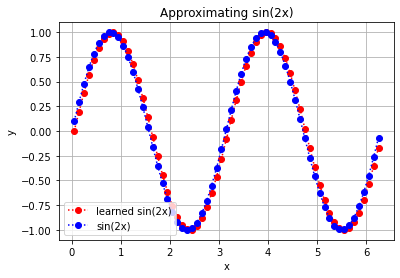

In [292]:
nb_RBF_nodes = 20
the_x_for_test = np.arange(0.05,2*np.pi,0.1)
the_testing_errors = []

sigma = 0.5       #Quelle valeur prendre ?
the_mu = np.linspace(0,2*np.pi,nb_RBF_nodes)  #ne pas mettre les mêmes mu car sinon matrice non inversible. Quelles valeurs prendre ?
#print(len(the_mu))
matrix_phi_transpose = []

for i in range(nb_RBF_nodes):
    matrix_phi_transpose.append([phi(x,the_mu[i],sigma) for x in the_x_for_test])

matrix_phi_transpose= np.array(matrix_phi_transpose)
matrix_phi = matrix_phi_transpose.T    

 #Solving the system

A = matrix_phi.T @ matrix_phi
Y = matrix_phi.T @ the_fk
W = np.linalg.solve(A,Y)

"""#Computing the training error
test_error = np.mean(np.abs(matrix_phi @ W - testing_set_1))
the_testing_errors.append(test_error)"""

print(len(the_x_for_test))
print(len(matrix_phi @ W))


plt.figure()
plt.plot(the_x_for_test, matrix_phi @ W, 'r:o', label='learned sin(2x)')
plt.plot(the_x_for_test, np.sin(2*the_x_for_test), "b:o", label="sin(2x)")
plt.title('Approximating sin(2x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

The residual error for 1 nodes is 0.8889563618669242
The residual error for 2 nodes is 0.7878177430422653
The residual error for 3 nodes is 0.7877681188072037
The residual error for 4 nodes is 0.5086692961319106
The residual error for 5 nodes is 0.7839389081190997
The residual error for 6 nodes is 0.3564303241185847
The residual error for 7 nodes is 0.29123494607213674
The residual error for 8 nodes is 0.2876747237610912
The residual error for 9 nodes is 0.30244331200585256
The residual error for 10 nodes is 0.27429960217228067
The residual error for 11 nodes is 0.2497830970166988
The residual error for 12 nodes is 0.2158426665661863
The residual error for 13 nodes is 0.2456652524933195
The residual error for 14 nodes is 0.17502657466446567
The residual error for 15 nodes is 0.18000030345301865
The residual error for 16 nodes is 0.17891098614834125
The residual error for 17 nodes is 0.1764873198643997
The residual error for 18 nodes is 0.1660265089778406
The residual error for 19 nodes

/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


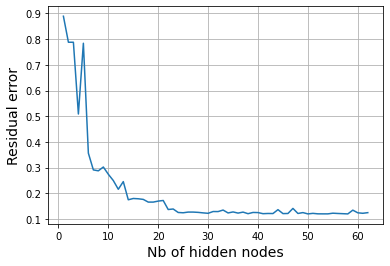

"plt.figure()\nplt.plot(RBF_nodes, the_testing_errors)\nplt.grid()\nplt.xlabel('Nb of hidden nodes')\nplt.ylabel('Test error')\nplt.ylim(0, 5)\nprint('The mimimal error is ' + str(min(the_testing_errors)) + ' for ' + str(np.argmin(the_testing_errors)) + ' hidden nodes')\nplt.show()"

In [16]:
RBF_nodes = [i for i in range(1,63)]
the_testing_errors_2 = []
the_residual_errors_2 = []


for i in range(len(RBF_nodes)):

    #Initialization of the matrix

    nb_RBF_nodes = RBF_nodes[i]
    #print(nb_RBF_nodes)
    sigma = 0.5       #Quelle valeur prendre ?
    the_mu_2 = np.linspace(0,2*np.pi,nb_RBF_nodes)  #ne pas mettre les mêmes mu car sinon matrice non inversible. Quelles valeurs prendre ?
    #print(len(the_mu))
    matrix_phi_transpose_2 = []

    for i in range(nb_RBF_nodes):
        matrix_phi_transpose_2.append([phi(x,the_mu_2[i],sigma) for x in the_x_for_train])

    matrix_phi_transpose_2= np.array(matrix_phi_transpose_2)
    matrix_phi_2 = matrix_phi_transpose_2.T    

    the_fk_2 =training_set_2

    #Solving the system

    A_2 = matrix_phi_2.T @ matrix_phi_2
    Y_2 = matrix_phi_2.T @ the_fk_2
    W_2 = np.linalg.solve(A_2,Y_2)
    #print(np.linalg.det(A))

    #Computing the training error
    residual_error_2 = np.mean(np.abs(matrix_phi_2 @ W_2 - the_fk_2))
    the_residual_errors_2.append(residual_error_2)
    print('The residual error for '+str(nb_RBF_nodes)+' nodes is ' + str(residual_error_2))
    


    """#Computing the testing error
    matrix_phi_transpose_test = []
    for i in range(nb_RBF_nodes):
        matrix_phi_transpose_test.append([phi(x,the_mu[i],sigma) for x in the_x_for_test])
    matrix_phi_transpose_test = np.array(matrix_phi_transpose_test)
    matrix_phi_test = matrix_phi_transpose_test.T

    testing_error = np.sum(np.power(matrix_phi_test @ W - the_fk,2))
    the_testing_errors.append(testing_error)"""



plt.figure()
plt.plot(RBF_nodes,the_residual_errors_2)
plt.grid()
plt.xlabel('Nb of hidden nodes', Fontsize= 14)
plt.ylabel('Residual error', Fontsize= 14)
#plt.xticks(RBF_nodes)
print('The mimimal error is ' + str(min(the_residual_errors_2)) + ' for ' + str(RBF_nodes[np.argmin(the_residual_errors_2)]) + ' hidden nodes')
plt.show()

"""plt.figure()
plt.plot(RBF_nodes, the_testing_errors)
plt.grid()
plt.xlabel('Nb of hidden nodes')
plt.ylabel('Test error')
plt.ylim(0, 5)
print('The mimimal error is ' + str(min(the_testing_errors)) + ' for ' + str(np.argmin(the_testing_errors)) + ' hidden nodes')
plt.show()"""

63
63


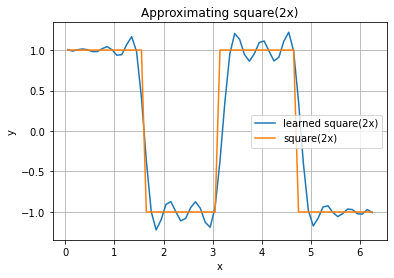

In [24]:
nb_RBF_nodes = 58
the_x_for_test = np.arange(0.05,2*np.pi,0.1)
the_testing_errors_2 = []

sigma = 0.5       #Quelle valeur prendre ?
the_mu_2 = np.linspace(0,2*np.pi,nb_RBF_nodes)  #ne pas mettre les mêmes mu car sinon matrice non inversible. Quelles valeurs prendre ?
#print(len(the_mu))
matrix_phi_transpose_2 = []

for i in range(nb_RBF_nodes):
    matrix_phi_transpose_2.append([phi(x,the_mu_2[i],sigma) for x in the_x_for_test])

matrix_phi_transpose_2= np.array(matrix_phi_transpose_2)
matrix_phi_2 = matrix_phi_transpose_2.T    

 #Solving the system

A_2 = matrix_phi_2.T @ matrix_phi_2
Y_2 = matrix_phi_2.T @ the_fk_2
W_2 = np.linalg.solve(A_2,Y_2)

"""#Computing the training error
test_error = np.mean(np.abs(matrix_phi @ W - testing_set_1))
the_testing_errors.append(test_error)"""

print(len(the_x_for_test))
print(len(matrix_phi_2 @ W_2))


plt.figure()
plt.plot(the_x_for_test, matrix_phi_2 @ W_2, label = 'learned square(2x)')
plt.plot(the_x_for_test, [f2(2*x) for x in the_x_for_test], label = 'square(2x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approximating square(2x)')
plt.legend()
plt.grid()
plt.show()

In [37]:
def least_square(training_x_set, training_y_set, nb_of_nodes, the_mus, sigma):
    matrix_phi_transpose = []
    

    for i in range(nb_of_nodes):
        matrix_phi_transpose.append([phi(x,the_mus[i],sigma) for x in training_x_set])

    matrix_phi_transpose= np.array(matrix_phi_transpose)
    matrix_phi = matrix_phi_transpose.T    

    #Solving the system

    A = matrix_phi.T @ matrix_phi
    Y = matrix_phi.T @ training_y_set
    W = np.linalg.solve(A,Y)

    return W, matrix_phi

In [95]:
A = np.array([1,2,1])
B = np.array([1,2,3])

np.inf

inf

3.2 Regression with noise

In [246]:
#Delta rule


def delta(training_data, learning_rate, nb_of_nodes, the_mu, sigma, function, matrix_phi, targets):  #the size of "the_mu" = nb of hidden nodes

    # training_data is a list of the SHUFFLED 1D (in our problem) patterns
    # the_mu iq the list of the mu of phi_1, ..., phi_n
    # function in the "real" function we want to approximate
    
    
    W = []
    for k in range(nb_of_nodes):
        W.append(random.uniform(-2,2))
    W = np.array(W)

   # W = np.linalg.pinv(matrix_phi) @ targets

    phi = lambda x,mu,sigma: np.exp((-(x-mu)**2)/(2*sigma**2))

    for j in range(100):
        training_data_copy = copy.deepcopy(training_data)
        random.shuffle(training_data_copy) 
    
        for i in range(len(training_data_copy)):
            
            the_phi = np.array([phi(training_data_copy[i],mu,sigma) for mu in the_mu])
            e = function(training_data_copy[i]) - np.sum(the_phi * W)
            delta_W = learning_rate*the_phi*e
            W = W + delta_W
    
    return W



For the delta learning, the residual error is minimal for 39 hidden nodes
For the least-square learning, the residual error is minimal for 8 hidden nodes


/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:84: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:85: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


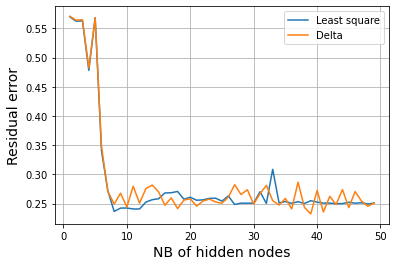

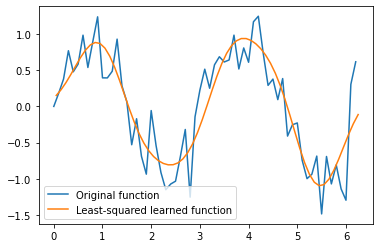

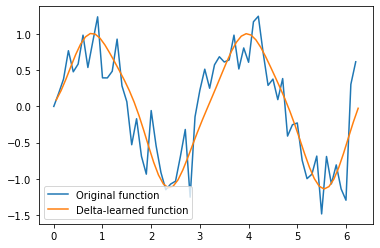

In [294]:

the_x_for_train = np.arange(0,2*np.pi,0.1)
the_x_for_test = np.arange(0.05,2*np.pi,0.1)
training_set_1 = np.array([f1(x) for x in the_x_for_train])
training_set_2 = np.array([f2(2*x) for x in the_x_for_train])
testing_set_1 = np.array([f1(x) for x in the_x_for_test])
testing_set_2 = np.array([f2(2*x) for x in the_x_for_test])



#Adding the noise

noise_train = np.random.normal(0,np.sqrt(0.1),size=training_set_1.shape)
noise_test = np.random.normal(0,np.sqrt(0.1),size=testing_set_1.shape)

training_set_1_noisy = training_set_1 + noise_train
testing_set_1_noisy = testing_set_1 + noise_test


RBF_nodes = [i for i in range(1,50)]

#For sin(2x)

iterations = 10

the_residual_errors_delta = []
the_residual_errors_least = []
W_delta_kept = 0
W_least_kept = 0
Nodes_delta_kept = 0
Nodes_least_kept = 0
matrix_phi_delta_kept = 0
matrix_phi_least_kept = 0
min_error_delta = np.inf
min_error_least = np.inf

for i in range(len(RBF_nodes)):
    
    #for j in range(iterations):
        #error_delta_it = 0
        #error_least_it = 0      
    the_mus = np.linspace(0,2*np.pi,RBF_nodes[i])
    #the_mus = []
    #for k in range(RBF_nodes[i]):
        #the_mus.append(random.uniform(0, 2*np.pi))
    #print(the_mus)

    W_least_square, matrix_phi = least_square(the_x_for_train, training_set_1_noisy, RBF_nodes[i], the_mus, 0.5)
    W_delta =  delta(the_x_for_train, 0.01, RBF_nodes[i], the_mus, 0.5 , f1, matrix_phi, training_set_1_noisy)
        
        
    
        
        #error_delta_it += np.mean(np.abs(matrix_phi @ W_delta - testing_set_1_noisy))
        #error_least_it += np.mean(np.abs(matrix_phi @ W_least_square - testing_set_1_noisy))


    #residual_error_delta = error_delta_it/iterations
    #residual_error_least = error_least_it/iterations

    residual_error_delta = np.mean(np.abs(matrix_phi @ W_delta - testing_set_1_noisy))
    the_residual_errors_delta.append(residual_error_delta)
    residual_error_least = np.mean(np.abs(matrix_phi @ W_least_square - testing_set_1_noisy))
    the_residual_errors_least.append(residual_error_least)
        
    if residual_error_delta < min_error_delta:
        min_error_delta = residual_error_delta
        W_delta_kept = W_delta
        matrix_phi_delta_kept = matrix_phi
        Nodes_delta_kept = RBF_nodes[i]
    
    if residual_error_least < min_error_least:
        min_error_least = residual_error_least
        W_least_kept = W_least_square
        matrix_phi_least_kept = matrix_phi
        Nodes_least_kept = RBF_nodes[i]


print('For the delta learning, the residual error is minimal for ' + str(Nodes_delta_kept) + ' hidden nodes')
print('For the least-square learning, the residual error is minimal for ' + str(Nodes_least_kept) + ' hidden nodes')

plt.figure()
plt.plot(RBF_nodes,the_residual_errors_least, label='Least square')
plt.plot(RBF_nodes,the_residual_errors_delta, label = 'Delta')
plt.xlabel('NB of hidden nodes', Fontsize=14)
plt.ylabel('Residual error', Fontsize=14)
plt.legend()
plt.grid()


plt.figure()
plt.plot(the_x_for_train,training_set_1_noisy, label='Original function')
plt.plot(the_x_for_test,matrix_phi_least_kept @ W_least_kept, label='Least-squared learned function')
plt.legend()


plt.figure()
plt.plot(the_x_for_train,training_set_1_noisy, label='Original function')
plt.plot(the_x_for_test,matrix_phi_delta_kept @ W_delta_kept, label='Delta-learned function')
plt.legend()
plt.show()

SQUARE(2X)

For the delta learning, the residual error is minimal for 3 hidden nodes
For the least-square learning, the residual error is minimal for 14 hidden nodes


/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:82: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


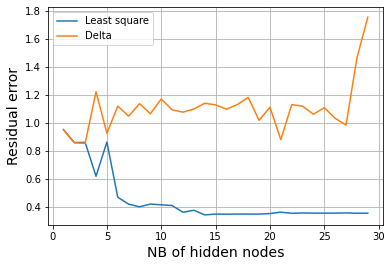

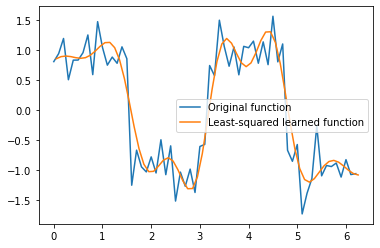

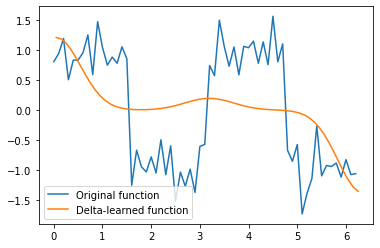

In [303]:

the_x_for_train = np.arange(0,2*np.pi,0.1)
the_x_for_test = np.arange(0.05,2*np.pi,0.1)
training_set_1 = np.array([f1(x) for x in the_x_for_train])
training_set_2 = np.array([f2(2*x) for x in the_x_for_train])
testing_set_1 = np.array([f1(x) for x in the_x_for_test])
testing_set_2 = np.array([f2(2*x) for x in the_x_for_test])



#Adding the noise

noise_train = np.random.normal(0,np.sqrt(0.1),size=training_set_1.shape)
noise_test = np.random.normal(0,np.sqrt(0.1),size=testing_set_1.shape)

training_set_2_noisy = training_set_2 + noise_train
testing_set_2_noisy = testing_set_2 + noise_test


RBF_nodes = [i for i in range(1,30)]

#For square(2x)

the_residual_errors_delta = []
the_residual_errors_least = []
W_delta_kept = 0
W_least_kept = 0
Nodes_delta_kept = 0
Nodes_least_kept = 0
matrix_phi_delta_kept = 0
matrix_phi_least_kept = 0
min_error_delta = np.inf
min_error_least = np.inf

for i in range(len(RBF_nodes)):
    
    #for j in range(iterations):
        #error_delta_it = 0
        #error_least_it = 0      
    the_mus = np.linspace(0,2*np.pi,RBF_nodes[i])
    #the_mus = []
    #for k in range(RBF_nodes[i]):
        #the_mus.append(random.uniform(0, 2*np.pi))
    #print(the_mus)

    W_least_square, matrix_phi = least_square(the_x_for_train, training_set_2_noisy, RBF_nodes[i], the_mus, 0.5)
    W_delta =  delta(the_x_for_train, 0.5, RBF_nodes[i], the_mus, 0.5 , f2, matrix_phi, training_set_2)
        
        
    
        
        #error_delta_it += np.mean(np.abs(matrix_phi @ W_delta - testing_set_1_noisy))
        #error_least_it += np.mean(np.abs(matrix_phi @ W_least_square - testing_set_1_noisy))


    #residual_error_delta = error_delta_it/iterations
    #residual_error_least = error_least_it/iterations

    residual_error_delta = np.mean(np.abs(matrix_phi @ W_delta - testing_set_2_noisy))
    the_residual_errors_delta.append(residual_error_delta)
    residual_error_least = np.mean(np.abs(matrix_phi @ W_least_square - testing_set_2_noisy))
    the_residual_errors_least.append(residual_error_least)
        
    if residual_error_delta < min_error_delta:
        min_error_delta = residual_error_delta
        W_delta_kept = W_delta
        matrix_phi_delta_kept = matrix_phi
        Nodes_delta_kept = RBF_nodes[i]
    
    if residual_error_least < min_error_least:
        min_error_least = residual_error_least
        W_least_kept = W_least_square
        matrix_phi_least_kept = matrix_phi
        Nodes_least_kept = RBF_nodes[i]


print('For the delta learning, the residual error is minimal for ' + str(Nodes_delta_kept) + ' hidden nodes')
print('For the least-square learning, the residual error is minimal for ' + str(Nodes_least_kept) + ' hidden nodes')

plt.figure()
plt.plot(RBF_nodes,the_residual_errors_least, label='Least square')
plt.plot(RBF_nodes,the_residual_errors_delta, label = 'Delta')
plt.xlabel('NB of hidden nodes', Fontsize =14)
plt.ylabel('Residual error', Fontsize =14)
plt.legend()
plt.grid()


plt.figure()
plt.plot(the_x_for_train,training_set_2_noisy, label='Original function')
plt.plot(the_x_for_test,matrix_phi_least_kept @ W_least_kept, label='Least-squared learned function')
plt.legend()


plt.figure()
plt.plot(the_x_for_train,training_set_2_noisy, label='Original function')
plt.plot(the_x_for_test,matrix_phi_delta_kept @ W_delta_kept, label='Delta-learned function')
plt.legend()
plt.show()

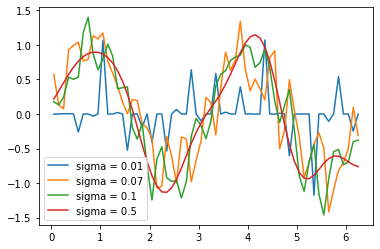

"plt.figure()\nplt.plot(the_sigmas,the_residual_errors_least, label='Least square (30 nodes)')\nplt.plot(the_sigmas,the_residual_errors_delta, label = 'Delta (19 nodes)')\nplt.xlabel('Sigma')\nplt.ylabel('Residual error')\nplt.legend()\nplt.grid()\nplt.show()"

In [306]:
the_x_for_train = np.arange(0,2*np.pi,0.1)
the_x_for_test = np.arange(0.05,2*np.pi,0.1)
training_set_1 = np.array([f1(x) for x in the_x_for_train])
training_set_2 = np.array([f2(2*x) for x in the_x_for_train])
testing_set_1 = np.array([f1(x) for x in the_x_for_test])
testing_set_2 = np.array([f2(2*x) for x in the_x_for_test])

#Adding the noise

noise_train = np.random.normal(0,np.sqrt(0.1),size=training_set_1.shape)
noise_test = np.random.normal(0,np.sqrt(0.1),size=testing_set_1.shape)


training_set_1_noisy = training_set_1 + noise_train
testing_set_1_noisy = testing_set_1 + noise_test


nb_RBF_nodes_delta = 39
nb_RBF_nodes_least = 8

the_sigmas = [0.01, 0.07,0.1, 0.5]
the_mus = np.linspace(0,2*np.pi,nb_RBF_nodes)



plt.figure()

the_residual_errors_delta = []
the_residual_errors_least = []
for i in range(len(the_sigmas)):
   
    the_mus_delta = np.linspace(0,2*np.pi,nb_RBF_nodes_delta)
    the_mus_least = np.linspace(0,2*np.pi,nb_RBF_nodes_least)
    W_least_square, matrix_phi_least = least_square(the_x_for_train, training_set_1_noisy, nb_RBF_nodes_least, the_mus_least, the_sigmas[i])
    _,matrix_phi_delta = least_square(the_x_for_train, training_set_1_noisy, nb_RBF_nodes_delta, the_mus_delta, the_sigmas[i])
    W_delta =  delta(the_x_for_train, 0.01, nb_RBF_nodes_delta, the_mus_delta, the_sigmas[i] , f1, matrix_phi, training_set_1)
    
    
    
    

    residual_error_delta = np.mean(np.abs(matrix_phi_delta @ W_delta - testing_set_1_noisy))
    the_residual_errors_delta.append(residual_error_delta)
    residual_error_least = np.mean(np.abs(matrix_phi_least @ W_least_square - testing_set_1_noisy))
    the_residual_errors_least.append(residual_error_least)
    #print(the_residual_errors_least)

    plt.plot(the_x_for_test, matrix_phi_delta @ W_delta, label = 'sigma = ' + str(the_sigmas[i]))
plt.legend()
#plt.title('Influence of sigma for the delta rule')
plt.show()


"""plt.figure()
plt.plot(the_sigmas,the_residual_errors_least, label='Least square (30 nodes)')
plt.plot(the_sigmas,the_residual_errors_delta, label = 'Delta (19 nodes)')
plt.xlabel('Sigma')
plt.ylabel('Residual error')
plt.legend()
plt.grid()
plt.show()"""


Test with the clean data

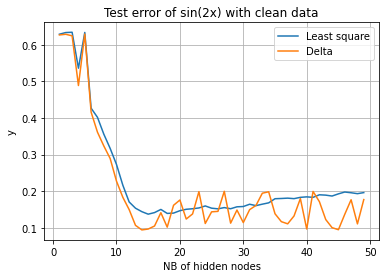

In [233]:
#For sin(2x) + testing with clean data

the_x_for_train = np.arange(0,2*np.pi,0.1)
the_x_for_test = np.arange(0.05,2*np.pi,0.1)
training_set_1 = np.array([f1(x) for x in the_x_for_train])
training_set_2 = np.array([f2(2*x) for x in the_x_for_train])
testing_set_1 = np.array([f1(x) for x in the_x_for_test])
testing_set_2 = np.array([f2(2*x) for x in the_x_for_test])

#Adding the noise

noise_train = np.random.normal(0,np.sqrt(0.1),size=training_set_1.shape)
noise_test = np.random.normal(0,np.sqrt(0.1),size=testing_set_1.shape)


training_set_1_noisy = training_set_1 + noise_train
testing_set_1_noisy = testing_set_1 + noise_test
training_set_2_noisy = training_set_2 + noise_train
testing_set_2_noisy = testing_set_2 + noise_test



the_residual_errors_delta = []
the_residual_errors_least = []
for i in range(len(RBF_nodes)):
    
    the_mus = np.linspace(0,2*np.pi,RBF_nodes[i])
    W_least_square, matrix_phi = least_square(the_x_for_train, training_set_1_noisy, RBF_nodes[i], the_mus, 0.2)
    W_delta =  delta(the_x_for_train, 0.01, RBF_nodes[i], the_mus, 0.2 , f1, matrix_phi,training_set_1 )
    
    
    
    

    residual_error_delta = np.mean(np.abs(matrix_phi @ W_delta - testing_set_1))
    the_residual_errors_delta.append(residual_error_delta)
    residual_error_least = np.mean(np.abs(matrix_phi @ W_least_square - testing_set_1))
    the_residual_errors_least.append(residual_error_least)
    


plt.figure()
plt.title('Test error of sin(2x) with clean data')
plt.plot(RBF_nodes,the_residual_errors_least, label='Least square')
plt.plot(RBF_nodes,the_residual_errors_delta, label = 'Delta')
plt.xlabel('NB of hidden nodes')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

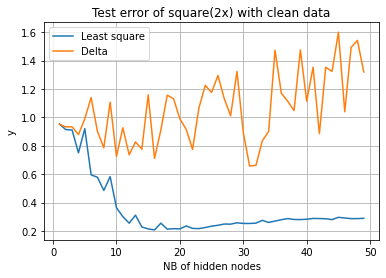

In [234]:
#For square(2x) + testing with clean data

the_x_for_train = np.arange(0,2*np.pi,0.1)
the_x_for_test = np.arange(0.05,2*np.pi,0.1)
training_set_1 = np.array([f1(x) for x in the_x_for_train])
training_set_2 = np.array([f2(2*x) for x in the_x_for_train])
testing_set_1 = np.array([f1(x) for x in the_x_for_test])
testing_set_2 = np.array([f2(2*x) for x in the_x_for_test])

#Adding the noise

noise_train = np.random.normal(0,np.sqrt(0.1),size=training_set_1.shape)
noise_test = np.random.normal(0,np.sqrt(0.1),size=testing_set_1.shape)


training_set_1_noisy = training_set_1 + noise_train
testing_set_1_noisy = testing_set_1 + noise_test
training_set_2_noisy = training_set_2 + noise_train
testing_set_2_noisy = testing_set_2 + noise_test



the_residual_errors_delta = []
the_residual_errors_least = []
for i in range(len(RBF_nodes)):
    
    the_mus = np.linspace(0,2*np.pi,RBF_nodes[i])
    W_least_square, matrix_phi = least_square(the_x_for_train, training_set_2_noisy, RBF_nodes[i], the_mus, 0.2)
    W_delta =  delta(training_set_2_noisy, 0.01, RBF_nodes[i], the_mus, 0.2 , f2, matrix_phi,training_set_2 )
    
    
    
    

    residual_error_delta = np.mean(np.abs(matrix_phi @ W_delta - testing_set_2))
    the_residual_errors_delta.append(residual_error_delta)
    residual_error_least = np.mean(np.abs(matrix_phi @ W_least_square - testing_set_2))
    the_residual_errors_least.append(residual_error_least)
    


plt.figure()
plt.title('Test error of square(2x) with clean data')
plt.plot(RBF_nodes,the_residual_errors_least, label='Least square')
plt.plot(RBF_nodes,the_residual_errors_delta, label = 'Delta')
plt.xlabel('NB of hidden nodes')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Influence of the learning rate

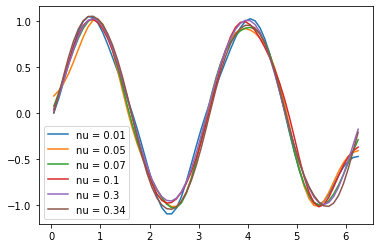

/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


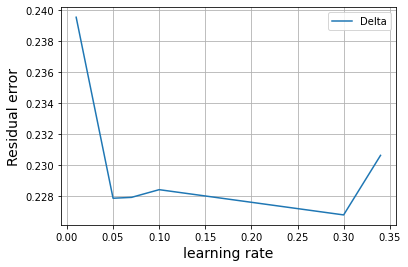

In [324]:
#For sin(2x)

the_x_for_train = np.arange(0,2*np.pi,0.1)
the_x_for_test = np.arange(0.05,2*np.pi,0.1)
training_set_1 = np.array([f1(x) for x in the_x_for_train])
training_set_2 = np.array([f2(2*x) for x in the_x_for_train])
testing_set_1 = np.array([f1(x) for x in the_x_for_test])
testing_set_2 = np.array([f2(2*x) for x in the_x_for_test])

#Adding the noise

noise_train = np.random.normal(0,np.sqrt(0.1),size=training_set_1.shape)
noise_test = np.random.normal(0,np.sqrt(0.1),size=testing_set_1.shape)


training_set_1_noisy = training_set_1 + noise_train
testing_set_1_noisy = testing_set_1 + noise_test
training_set_2_noisy = training_set_2 + noise_train
testing_set_2_noisy = testing_set_2 + noise_test

the_learning_rates = [0.01,0.05, 0.07, 0.1, 0.3, 0.34]
nb_RBF_nodes_delta = 39

plt.figure()

the_residual_errors_delta = []
for i in range(len(the_learning_rates)):
    residual_error_delta = 0
    for j in range(10): #iterations 
    
        the_mus_delta = np.linspace(0,2*np.pi,nb_RBF_nodes_delta)
        _,matrix_phi_delta = least_square(the_x_for_train, training_set_1_noisy, nb_RBF_nodes_delta, the_mus_delta, 0.5)
        W_delta =  delta(the_x_for_train, the_learning_rates[i], nb_RBF_nodes_delta, the_mus_delta, 0.5 , f1, matrix_phi, training_set_1_noisy)
    
    
    
    

        residual_error_delta += np.mean(np.abs(matrix_phi_delta @ W_delta - testing_set_1_noisy))
    
    the_residual_errors_delta.append(residual_error_delta/10)
    plt.plot(the_x_for_test, matrix_phi_delta @ W_delta, label = 'nu = ' + str(the_learning_rates[i]))
plt.legend()
#plt.title('Influence of the learning rate for the delta rule')
plt.show()

    
    #print(the_residual_errors_least)
    


plt.figure()
#plt.title('For sin(2x)')
plt.plot(the_learning_rates,the_residual_errors_delta, label = 'Delta')
plt.xlabel('learning rate', Fontsize = 14)
plt.ylabel('Residual error', Fontsize = 14)
#plt.xlim([0,0.5])
plt.legend()
plt.grid()
plt.show()

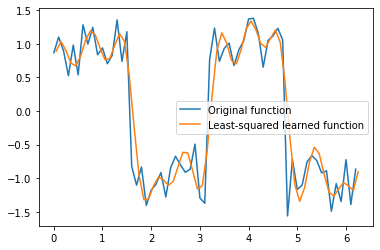

In [288]:

the_x_for_train = np.arange(0,2*np.pi,0.1)
the_x_for_test = np.arange(0.05,2*np.pi,0.1)
training_set_1 = np.array([f1(x) for x in the_x_for_train])
training_set_2 = np.array([f2(2*x) for x in the_x_for_train])
testing_set_1 = np.array([f1(x) for x in the_x_for_test])
testing_set_2 = np.array([f2(2*x) for x in the_x_for_test])



#Adding the noise

noise_train = np.random.normal(0,np.sqrt(0.1),size=training_set_1.shape)
noise_test = np.random.normal(0,np.sqrt(0.1),size=testing_set_1.shape)

training_set_2_noisy = training_set_2 + noise_train
testing_set_2_noisy = testing_set_2 + noise_test


RBF_nodes_delta = 24

#For square(2x)

the_residual_errors_delta = []
the_residual_errors_least = []
W_delta_kept = 0
W_least_kept = 0
Nodes_delta_kept = 0
Nodes_least_kept = 0
matrix_phi_delta_kept = 0
matrix_phi_least_kept = 0
min_error_delta = np.inf
min_error_least = np.inf


    
#for j in range(iterations):
    #error_delta_it = 0
    #error_least_it = 0      
the_mus = np.linspace(0,2*np.pi,RBF_nodes_delta)
#the_mus = []
#for k in range(RBF_nodes[i]):
    #the_mus.append(random.uniform(0, 2*np.pi))
#print(the_mus)

W_least_square, matrix_phi = least_square(the_x_for_train, training_set_2_noisy, RBF_nodes_delta, the_mus, 0.5)

    
    

    
    #error_delta_it += np.mean(np.abs(matrix_phi @ W_delta - testing_set_1_noisy))
    #error_least_it += np.mean(np.abs(matrix_phi @ W_least_square - testing_set_1_noisy))


#residual_error_delta = error_delta_it/iterations
#residual_error_least = error_least_it/iterations

residual_error_least = np.mean(np.abs(matrix_phi @ W_least_square - testing_set_2_noisy))
the_residual_errors_least.append(residual_error_least)
    






plt.figure()
plt.plot(the_x_for_train,training_set_2_noisy, label='Original function')
plt.plot(the_x_for_test,matrix_phi @ W_least_square, label='Least-squared learned function')
plt.legend()

